In [107]:
# installing necessary packages
!pip install plotly

In [168]:
!pip install sklearn
!pip install xgboost

  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://g

In [1]:
!pip install pandas 
!pip install numpy 
!pip install matplotlib
!pip install seaborn


In [2]:
# importing pandas numpy
import pandas as pd
import numpy as np

In [3]:
# importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
l1 = 'soil_moisture_devices.csv'  # battery data 
l2 = 'soil_moisture_sensors.csv'  # sensors data

In [5]:
# reading csv file from the necessary location path
df1 = pd.read_csv(l1)   # battery data 
df2 = pd.read_csv(l2)   # sensors data 

In [6]:
# first 5 rows for battery data
df1.head()

,time,device_id,key,value,insert_ts,device_id..6,site_id,start_date,end_date,study_id,group_id
0,2000-01-01 00:00:03,2025020719-0EC5F645,disk,0.462500,2025-02-08 00:17:05.165919,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
1,2000-01-01 00:00:03,2025020719-0EC5F645,battery,0.829068,2025-02-08 00:17:05.167964,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
2,2000-01-01 00:00:03,2025020719-0EC5F645,disk,0.462500,2025-02-09 22:13:16.649023,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
3,2000-01-01 00:00:03,2025020719-0EC5F645,battery,0.954101,2025-02-09 22:13:16.649796,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
4,2000-01-01 00:05:15,2025020719-0EC5F645,disk,0.462500,2025-02-09 22:18:22.835961,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN


In [7]:
df1.columns # list of columns 

Index(['time', 'device_id', 'key', 'value', 'insert_ts', 'device_id..6',
       'site_id', 'start_date', 'end_date', 'study_id', 'group_id'],
      dtype='object')

In [8]:
df1.key.unique()

array(['disk', 'battery'], dtype=object)

In [9]:
# first 5 rows for sensors data
df2.head() 

,time,device_id,key,value,insert_ts,device_id..6,site_id,start_date,end_date,study_id,group_id
0,2025-02-08 00:32:16,2025020719-0EC5F645,temperature,24.36,2025-02-08 00:32:17.909959,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
1,2025-02-08 00:32:16,2025020719-0EC5F645,soil_m,46331.00,2025-02-08 00:32:17.909962,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
2,2025-02-08 00:32:16,2025020719-0EC5F645,humidity,21.81,2025-02-08 00:32:17.909959,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
3,2025-02-08 00:32:16,2025020719-0EC5F645,pressure,1008.22,2025-02-08 00:32:17.909959,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN
4,2025-02-08 00:37:21,2025020719-0EC5F645,temperature,24.81,2025-02-08 00:37:22.408342,2025020719-0EC5F645,mile-end,2025-02-10,NaN,precipitation estimation,NaN


In [10]:
df2.key.unique() # list of sensors , required data is only for soil moisture

array(['temperature', 'soil_m', 'humidity', 'pressure'], dtype=object)

In [11]:
df1.shape 

(38004, 11)

In [12]:
df2.shape

(75940, 11)

In [13]:
# time stamp, where we can extract more stable time stamp for battery data
df1['ts']  = df1.insert_ts.str.split('.').str[0]
df1['ts']

0        2025-02-08 00:17:05
1        2025-02-08 00:17:05
2        2025-02-09 22:13:16
3        2025-02-09 22:13:16
4        2025-02-09 22:18:22
                ...         
37999    2025-02-20 00:10:21
38000    2025-02-20 00:05:14
38001    2025-02-20 00:05:14
38002    2025-02-20 00:00:09
38003    2025-02-20 00:00:09
Name: ts, Length: 38004, dtype: object

In [14]:
# time stamp, where we can extract more stable time stamp for sensor data
df2['ts']  = df2.insert_ts.str.split('.').str[0]
df2['ts']

0        2025-02-08 00:32:17
1        2025-02-08 00:32:17
2        2025-02-08 00:32:17
3        2025-02-08 00:32:17
4        2025-02-08 00:37:22
                ...         
75935    2025-02-20 00:05:14
75936    2025-02-20 00:00:09
75937    2025-02-20 00:00:09
75938    2025-02-20 00:00:09
75939    2025-02-20 00:00:09
Name: ts, Length: 75940, dtype: object

In [15]:
# extracting battery and soil moisture data as df_battery and df_soil_m data respectively
df_battery = df1[df1.key == 'battery']
df_soil_m = df2[df2.key == 'soil_m' ]


In [16]:
df_battery.columns

Index(['time', 'device_id', 'key', 'value', 'insert_ts', 'device_id..6',
       'site_id', 'start_date', 'end_date', 'study_id', 'group_id', 'ts'],
      dtype='object')

In [17]:
# extracting all the relevant data 
df_battery = df_battery[['key','value','ts','device_id..6' ]]
df_battery.columns = ['key_battery','value_battery','ts','device_id']



In [18]:
# extracting all the relevant data 
df_soil_m = df_soil_m[['key','value','ts','device_id..6' ]]
df_soil_m.columns = ['key_soilm','value_soilm','ts','device_id']

In [19]:
# merging dara both battery and soil moisture 
df = pd.merge(df_battery, df_soil_m, on="ts", how="inner")

In [20]:
df.head()

,key_battery,value_battery,ts,device_id_x,key_soilm,value_soilm,device_id_y
0,battery,0.829068,2025-02-08 00:17:05,2025020719-0EC5F645,soil_m,45995.0,2025020719-0EC5F645
1,battery,0.954101,2025-02-09 22:13:16,2025020719-0EC5F645,soil_m,42010.0,2025020719-0EC5F645
2,battery,0.953612,2025-02-09 22:18:22,2025020719-0EC5F645,soil_m,42442.0,2025020719-0EC5F645
3,battery,0.685466,2025-02-17 13:31:10,2025020719-0EC5F645,soil_m,14483.0,2025020719-0EC5F645
4,battery,0.808545,2025-02-17 13:36:17,2025020719-0EC5F645,soil_m,24293.0,2025020719-0EC5F645


In [21]:
df = df[['ts','key_battery','value_battery', 'key_soilm','value_soilm','device_id_x','device_id_y']]
df.columns = ['ts','key_battery','value_battery', 'key_soilm','value_soilm','device_id_battery','device_id_sensor']
df.head()

,ts,key_battery,value_battery,key_soilm,value_soilm,device_id_battery,device_id_sensor
0,2025-02-08 00:17:05,battery,0.829068,soil_m,45995.0,2025020719-0EC5F645,2025020719-0EC5F645
1,2025-02-09 22:13:16,battery,0.954101,soil_m,42010.0,2025020719-0EC5F645,2025020719-0EC5F645
2,2025-02-09 22:18:22,battery,0.953612,soil_m,42442.0,2025020719-0EC5F645,2025020719-0EC5F645
3,2025-02-17 13:31:10,battery,0.685466,soil_m,14483.0,2025020719-0EC5F645,2025020719-0EC5F645
4,2025-02-17 13:36:17,battery,0.808545,soil_m,24293.0,2025020719-0EC5F645,2025020719-0EC5F645


In [22]:
# converting ts from string type time stamp
df['ts'] = pd.to_datetime(df['ts'])

<Axes: xlabel='ts', ylabel='value_battery'>

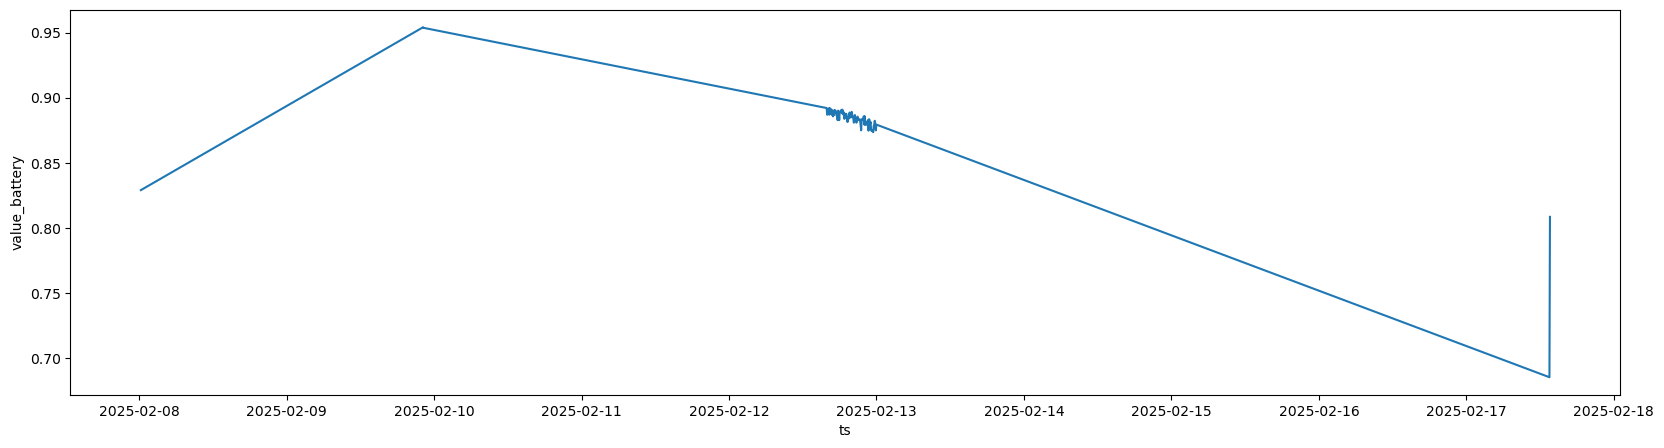

In [23]:
plt.figure(figsize=(20, 5))  # Width = 10 inches, Height = 5 inches
# df['ts'].astype()
sns.lineplot(data=df.iloc[:100], x='ts', y='value_battery')

## value_battery vs ts 

data ranges from 2025-02-08 to 2025-02-22, but most of the data are scattered around 12 to 13th of feb 2025

<Axes: xlabel='ts', ylabel='value_soilm'>

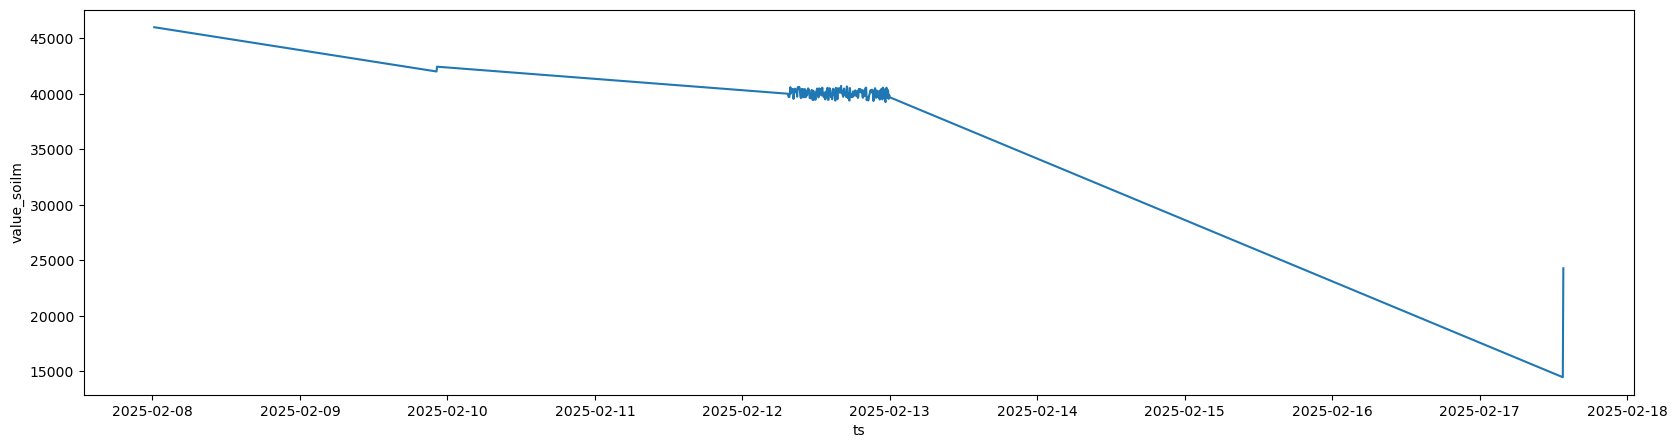

In [25]:
plt.figure(figsize=(20, 5))  # Width = 10 inches, Height = 5 inches
# df['ts'].astype()
sns.lineplot(data=df.iloc[:200], x='ts', y='value_soilm')

## value_soilm vs ts 

data ranges from 2025-02-08 to 2025-02-22, but most of the data are scattered around 12 to 13th of feb 2025

In [26]:
import plotly.express as px
# Ensure 'ts' is in datetime format
# df['ts'] = pd.to_datetime(df['ts'])

# Create Plotly line plot
fig = px.line(df.iloc[:200], x='ts', y='value_soilm', title="Soil Moisture Over Time", labels={'ts': 'Timestamp', 'value_soilm': 'Soil Moisture Value'})

# Show the plot
fig.show()

In [27]:
# from time stamp data extracting date and month 
df['date'] = df['ts'].dt.day  # Extracts only the date (YYYY-MM-DD)
df['month'] = df['ts'].dt.month 

In [28]:
# extracting data from 12 to 13 of feb month
df_temp =  df[(df.date > 11) &(df.date <14)]

In [164]:
# Create Plotly line plot with legend based on 'device_type'
fig = px.line(df_temp, x='ts', y='value_soilm', color='device_id_sensor',  
              title="Soil Moisture Over Time",  
              labels={'ts': 'Timestamp', 'value_soilm': 'Soil Moisture Value', 'device_id_sensor': 'device_id_sensor'})

# Show the plot
fig.show()

# Soil moisture over time
* There are 6 different sensors data 
* all the data displayed is almost stable except for 2025020823-6F518CD1
* there is sudden drop in the value of sensor 2025020823-6F518CD1 from feb 13th and drops down to zero

In [165]:
# Create Plotly line plot with legend based on 'device_type'
fig = px.line(df_temp, x='ts', y='value_battery', color='device_id_sensor',  
              title="battery Over Time",  
              labels={'ts': 'Timestamp', 'value_battery': 'battery Value', 'device_id_sensor': 'device_id_sensor'})

# Show the plot
fig.show()

# Battery over time 
* all the battery data is almost good
* there is drop in battery for sensor 2025020823-6F518CD1
* this can be considered as a reason to cause change in sensor values for 2025020823-6F518CD1

In [167]:
df.device_id_sensor.unique()

array(['2025020719-0EC5F645', '2025020823-B62A6A43',
       '2025020909-173DFFA0', '2025020822-1E6C21E9',
       '2025020823-6F518CD1', '2025020821-4095DB3C'], dtype=object)

# Time series analysis for device id  2025020823-6F518CD1

In [173]:
# Create Plotly line plot with legend based on 'device_type'
fig = px.line(df_device, x='ts', y='value_battery', color='device_id_sensor',  
              title="battery Over Time",  
              labels={'ts': 'Timestamp', 'value_battery': 'battery Value', 'device_id_sensor': 'device_id_sensor'})

# Show the plot
fig.show()

# battery over time for 2025020823-6F518CD1
* there is sudden drop in value moisture sensor dure to battery issue

In [179]:
df_device = df_temp[['ts', 'key_battery', 'value_battery', 'key_soilm', 'value_soilm',
       'device_id_battery', 'device_id_sensor']]
df_device = df_device[df_device.device_id_sensor == '2025020823-6F518CD1']

In [180]:
# Create Plotly line plot with legend based on 'device_type'
fig = px.line(df_device, x='ts', y='value_soilm', color='device_id_sensor',  
              title="Soil Moisture Over Time",  
              labels={'ts': 'Timestamp', 'value_soilm': 'Soil Moisture Value', 'device_id_sensor': 'device_id_sensor'})

# Show the plot
fig.show()

# Soil moisture over time for 2025020823-6F518CD1
* soil moisture value drops at the end 


In [181]:
# soil moisture around 40k is only considered 
df_device_2 = df_device[df_device.value_soilm >40000]

In [183]:
# Create Plotly line plot with legend based on 'device_type'
fig = px.line(df_device_2, x='ts', y='value_soilm', color='device_id_sensor',  
              title="Soil Moisture Over Time",  
              labels={'ts': 'Timestamp', 'value_soilm': 'Soil Moisture Value', 'device_id_sensor': 'device_id_sensor'})

# Show the plot
fig.show()

# Soil Moisture over time
* all the data is filtered for 2025020823-6F518CD1

In [171]:
df_temp.columns

Index(['ts', 'key_battery', 'value_battery', 'key_soilm', 'value_soilm',
       'device_id_battery', 'device_id_sensor', 'date', 'month'],
      dtype='object')

# ML Time series for moisture sensor

In [184]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 MB 12.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 41.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 39.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.1/405.1 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 40.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 335.8/335.8 kB 25.0 MB/s eta 0:00:00


Epoch 1/20


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.2214 - val_loss: 0.0650
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0625 - val_loss: 0.0506
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0503 - val_loss: 0.0469
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0489 - val_loss: 0.0467
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0481 - val_loss: 0.0461
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0468 - val_loss: 0.0459
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0458 - val_loss: 0.0457
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0517 - val_loss: 0.0456
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0457 - val_loss: 0.0457
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0459 - val_loss: 0.0453
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0450 - val_loss: 0.0451
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0461 - val_loss: 0.0453

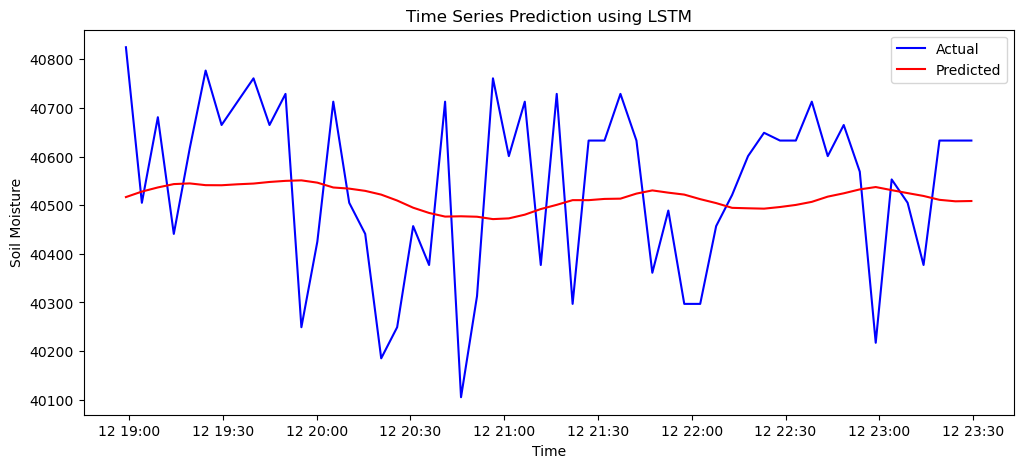

In [190]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Convert timestamp column to datetime
df['ts'] = pd.to_datetime(df_device_2['ts'])
df = df_device_2.sort_values(by='ts')  # Sort in chronological order

# Select relevant columns
df_device_2 = df_device_2[['ts', 'value_soilm']]

# Normalize values (LSTM performs better with scaled data)
scaler = MinMaxScaler()
df_device_2['value_soilm'] = scaler.fit_transform(df_device_2[['value_soilm']])

# Create sequences for LSTM
def create_sequences(df_device_2, seq_length=10):
    X, y = [], []
    for i in range(len(df_device_2) - seq_length):
        X.append(df_device_2[i:i+seq_length])  # Past 'seq_length' values
        y.append(df_device_2[i+seq_length])    # Next value
    return np.array(X), np.array(y)

seq_length = 10  # Number of past timesteps to consider
X, y = create_sequences(df_device_2['value_soilm'].values, seq_length)

# Reshape for LSTM [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split into training and test sets
train_size = int(len(X) * 0.8)  # 80% Train, 20% Test
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_test, y_test))

# Predictions
y_pred = model.predict(X_test)

# Inverse transform to original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)

# Evaluate the model
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Plot Actual vs Predicted
plt.figure(figsize=(12, 5))
plt.plot(df['ts'][train_size+seq_length:], y_test_inv, label="Actual", color='blue')
plt.plot(df['ts'][train_size+seq_length:], y_pred_inv, label="Predicted", color='red')
plt.legend()
plt.title("Time Series Prediction using LSTM")
plt.xlabel("Time")
plt.ylabel("Soil Moisture")
plt.show()
